# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [39]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [40]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
df = tips.copy()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [41]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        08:32:30   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.53285)

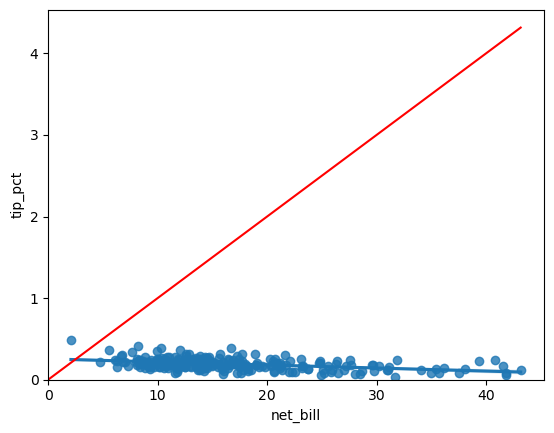

In [42]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct```em função de um polinômio de segundo grau em ```net_bill```.

In [43]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid
tips


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.06e-09
Time:                        08:32:35   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.116663
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.097375
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.036269
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.023174
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.036906
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.132694
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-0.036894
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-0.040471
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-0.069950


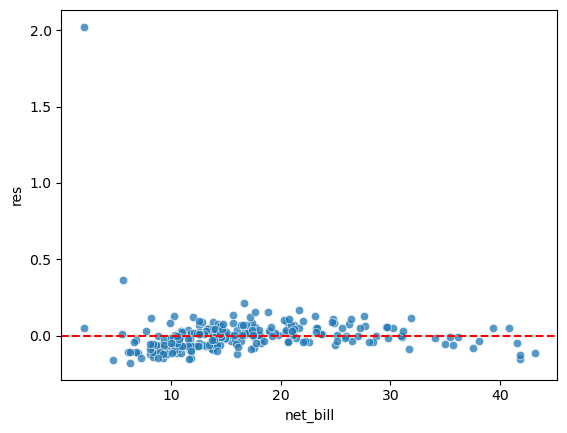

In [44]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

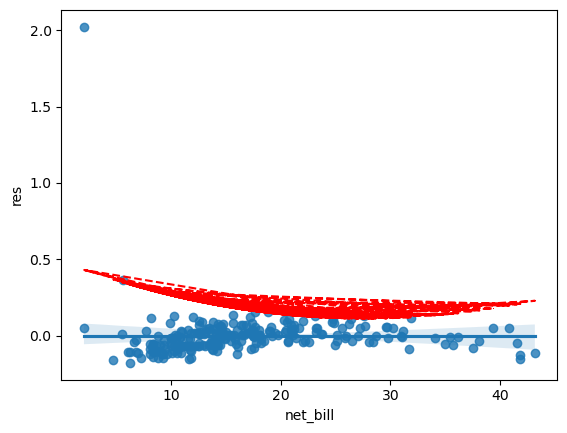

In [45]:
sns.regplot(x = 'net_bill', y = 'res', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função do logaritmo em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.62e-13
Time:                        08:32:37   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

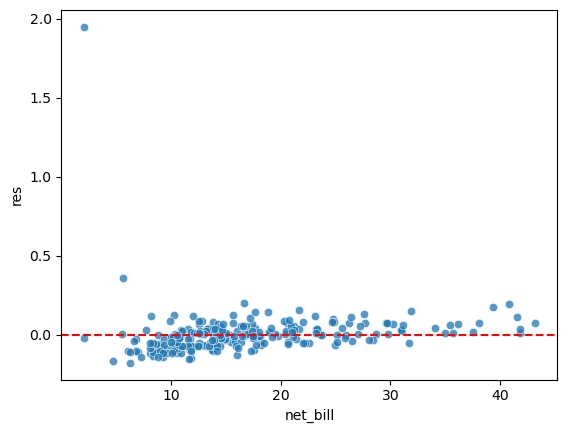

In [46]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

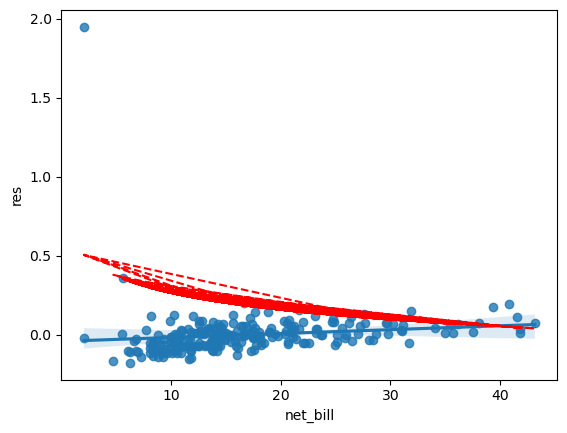

In [47]:
sns.regplot(x = 'net_bill', y = 'res', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           8.27e-16
Time:                        08:32:39   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

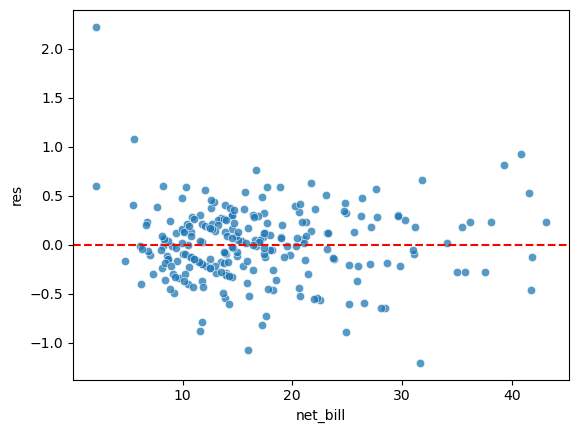

In [48]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [49]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)

tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.11440988592529763

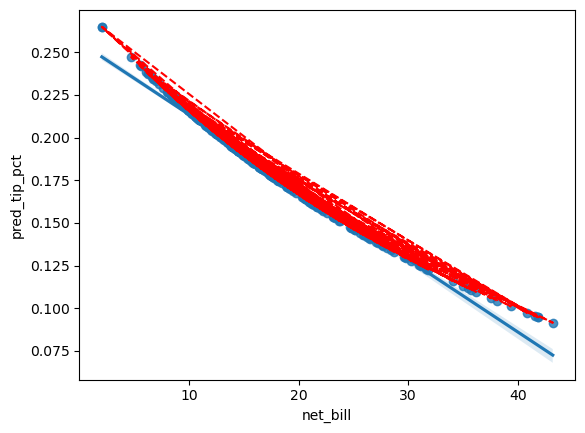

In [50]:
sns.regplot(x = 'net_bill', y = 'pred_tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.20e-20
Time:                        08:32:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

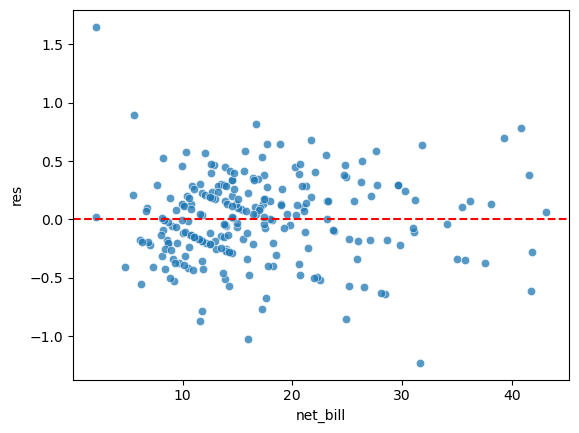

In [51]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [52]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)

tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322287

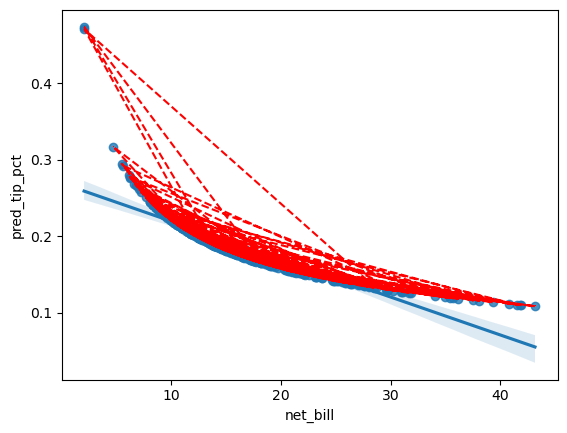

In [53]:
sns.regplot(x = 'net_bill', y = 'pred_tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

O modelo que utilizou funções logarítmicas em ambas abscisas resultou no melhor ajuste, apresentando um R² maior que as outras regressões experimentadas. 